In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder

#from lightgbm import LGBMClassifier
plt.rcParams['figure.figsize'] = [5, 5]
pd.set_option('display.max_columns', None)
# model explainability use case
#!pip install lime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
from lime.lime_tabular import LimeTabularExplainer
import shap

In [2]:
df = pd.read_csv('MDD+NC.csv')
df.head()


,Type,Sex,Age,Education_years
0,MDD,2,36,18.0
1,MDD,2,28,15.0
2,MDD,2,55,11.0
3,MDD,2,48,8.0
4,MDD,1,21,13.0


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Type', ylabel='count'>

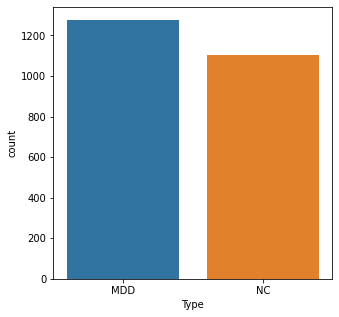

In [3]:
sns.countplot(df['Type'],label="Count")

In [4]:
from pandas.plotting import scatter_matrix
import pandas as pd
from matplotlib import cm
feature_names = ['Sex', 'Age', 'Education_years']
X = df[feature_names]
y = df["Type"]

y.shape


(2380,)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train_new = le.fit_transform(y_train)
y_test_new = le.fit_transform(y_test)
#y_train_new = tf.keras.utils.to_categorical(y_train_new, num_classes=2)
#y_test_new = tf.keras.utils.to_categorical(y_test_new, num_classes=2)
for i,item in enumerate(le.classes_):
    print(item, '--->',i)

MDD ---> 0
NC ---> 1


In [8]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 3)
X_test Shape:  (476, 3)
y_train Shape:  (1904,)
y_test Shape:  (476,)


In [10]:
lr=LogisticRegression(C=10.0, random_state=0).fit(X_train,y_train)
#lr.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.57


In [12]:
df_new=DecisionTreeClassifier(criterion='entropy',max_depth=20, random_state=0).fit(X_train, y_train)
#df_N = df_new().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(df_new.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(df_new.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on test set: 0.62


<AxesSubplot:>

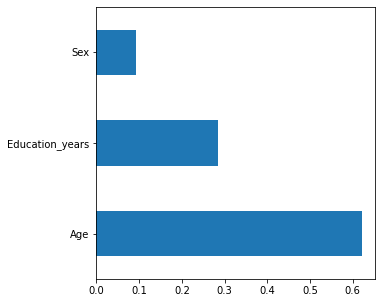

In [218]:
feat_importances = pd.Series(df_new.feature_importances_, index = feature_names)
feat_importances.nlargest(3).plot(kind = 'barh')

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train, y_train)
#rf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.81
Accuracy of Random Forest classifier on test set: 0.62


In [15]:
model=RandomForestClassifier(n_estimators=100,min_samples_leaf=1, min_samples_split=2,criterion='gini').fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.81
Accuracy of Random Forest classifier on test set: 0.62


<AxesSubplot:>

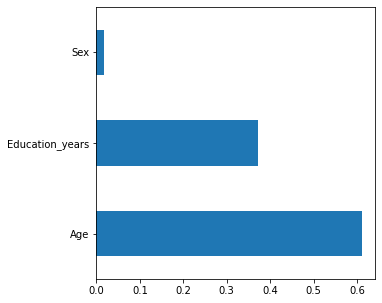

In [217]:
feat_importances = pd.Series(model.feature_importances_, index = feature_names)
feat_importances.nlargest(3).plot(kind = 'barh')

In [17]:
#n_neighbors=3, p=3, metric='minkowski'
KNN=KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=1, p=2,
 weights='uniform')
KNN.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(KNN.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(KNN.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.59


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1, solver='lsqr',shrinkage=0.001)
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.60
Accuracy of LDA classifier on test set: 0.57


In [20]:
SVM=SVC(kernel='rbf',gamma=10000, C=10.0, random_state=0)
SVM.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(SVM.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(SVM.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.62


In [171]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = df_new.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[266 116]
 [161 171]]
              precision    recall  f1-score   support

         MDD       0.62      0.70      0.66       382
          NC       0.60      0.52      0.55       332

    accuracy                           0.61       714
   macro avg       0.61      0.61      0.61       714
weighted avg       0.61      0.61      0.61       714



In [188]:
row_to_show = 5
data_for_prediction = X_test[row_to_show]  # use 1 row of data here. Could use multiple rows if desired


In [189]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(df_new)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [190]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [210]:
explainer=shap.TreeExplainer(model=model,data=None,model_output='raw',feature_perturbation='tree_path_independent')

In [211]:
shap_values=explainer.shap_values(X_test)

In [212]:
row = 5
data_for_prediction = X_test[row]

In [213]:
features = ['Sex','Age','Education']

In [196]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0])

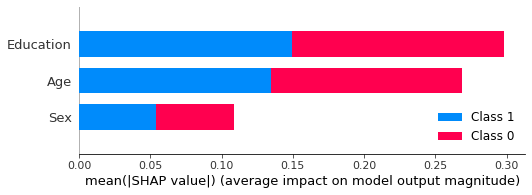

In [216]:
shap.summary_plot(shap_values,features,plot_type='bar')

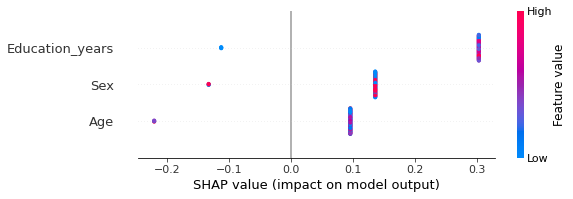

In [47]:
shap.summary_plot(shap_values,features)

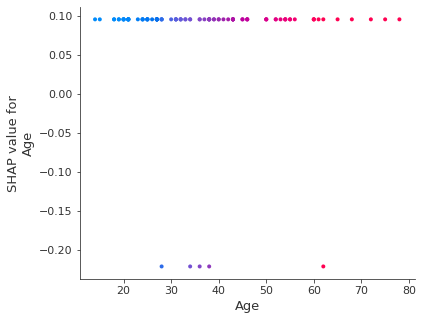

In [48]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

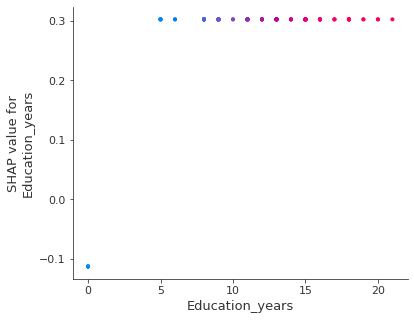

In [50]:
shap.dependence_plot(ind='Education_years', interaction_index='Education_years',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

In [53]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0])